# Comprehensive Guide to Exploratory Data Analysis (EDA)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
sns.set_style("whitegrid")

In [3]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income",
]
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1. Splitting Data into Categorical and Numerical Columns

### What We Are Doing
In this step, we will split the dataset into two separate categories:
1. **Categorical Variables** – Variables that represent categories or discrete values (e.g., "workclass," "occupation").
2. **Numerical Variables** – Variables that are continuous or represent numbers (e.g., "age," "hours-per-week").

### Why We Are Doing This
Splitting the data into categorical and numerical variables is crucial because different EDA techniques apply to different data types:
- **Categorical Variables** often require frequency counts, proportions, or chi-square tests to explore relationships.
- **Numerical Variables** can be explored with measures of central tendency, dispersion, histograms, and correlation matrices.
- This distinction allows us to:
  - Apply appropriate transformations and visualisations.
  - Avoid errors in statistical tests or preprocessing steps.

In [4]:
# Splitting the columns
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
numerical_columns = df.select_dtypes(exclude=["object"]).columns.tolist()

# Display the lists of columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Numerical Columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


## 2. Descriptive Statistics

### What We Are Doing
In this section, we will calculate and visualise the descriptive statistics for our dataset. For numerical variables, we will:
- Compute measures such as mean, median, standard deviation, minimum, and maximum.
- Create visualisations like histograms and boxplots to explore the data distribution.

For categorical variables, we will:
- Compute frequency counts and proportions.
- Use bar charts to visualise the distribution of categories.

### Why We Are Doing This
Descriptive statistics give us a quick understanding of our dataset:
- **Numerical Variables:** By assessing measures of central tendency and dispersion, we can identify potential outliers, skewness, and overall distribution shape.
- **Categorical Variables:** Frequency counts and bar charts help us grasp how data is distributed among different categories, which is essential for further analysis and model building.

The insights obtained at this stage will guide us in data cleaning, feature engineering, and more advanced analyses.


In [5]:
# Descriptive statistics for numerical variables
df[numerical_columns].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
# Descriptive statistics for categorical variables
df[categorical_columns].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


#### Histograms

##### What We Are Doing
We will create histograms for each numerical variable. Histograms help us visualise the frequency distribution and understand the overall shape (e.g., skewness, modality) of the data.

##### Why We Are Doing This
Histograms are essential because:
- They reveal the distribution pattern of data.
- They help detect any skewness or multimodality.
- They provide insight into the spread and density of the data values.

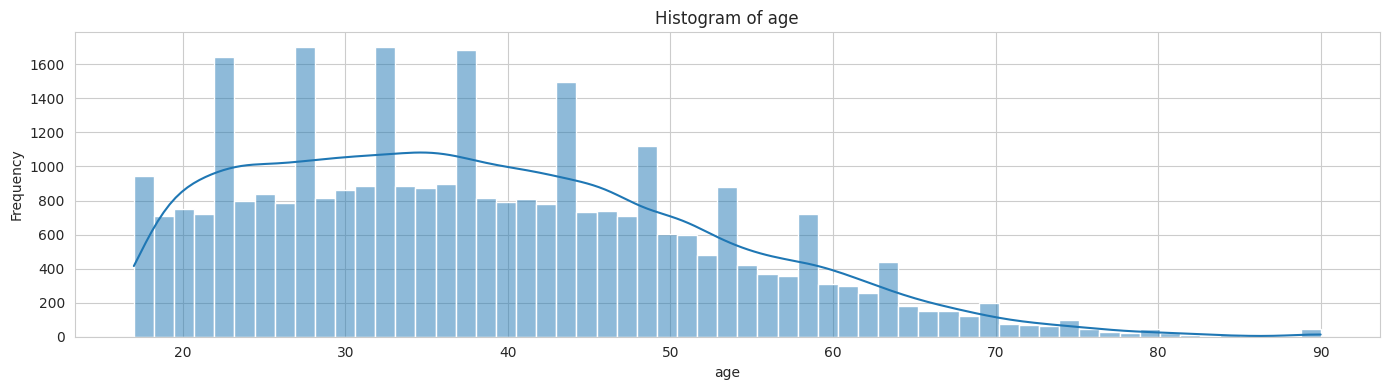

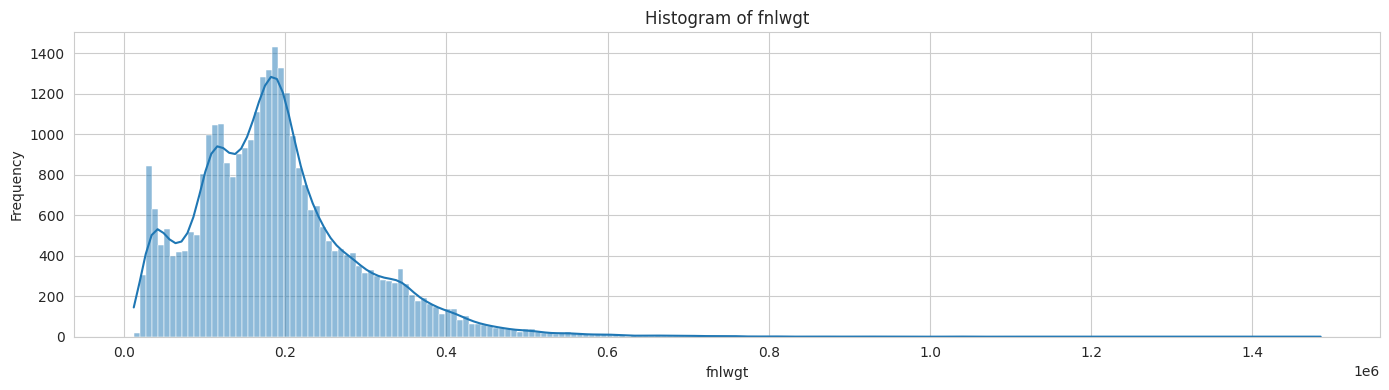

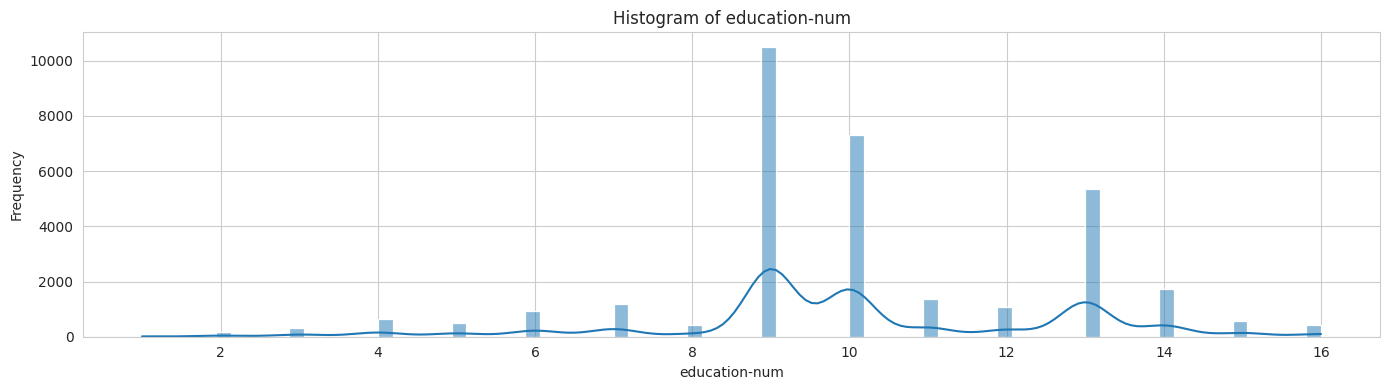

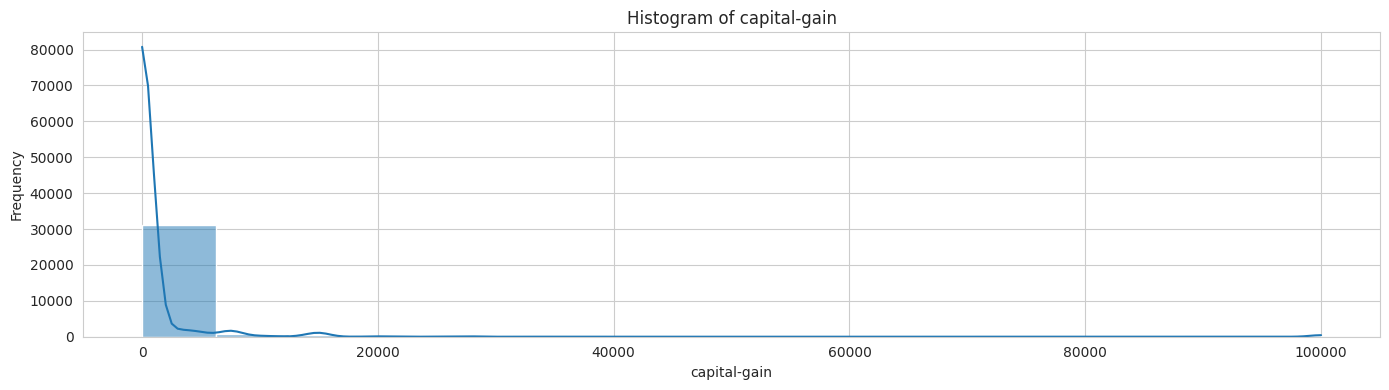

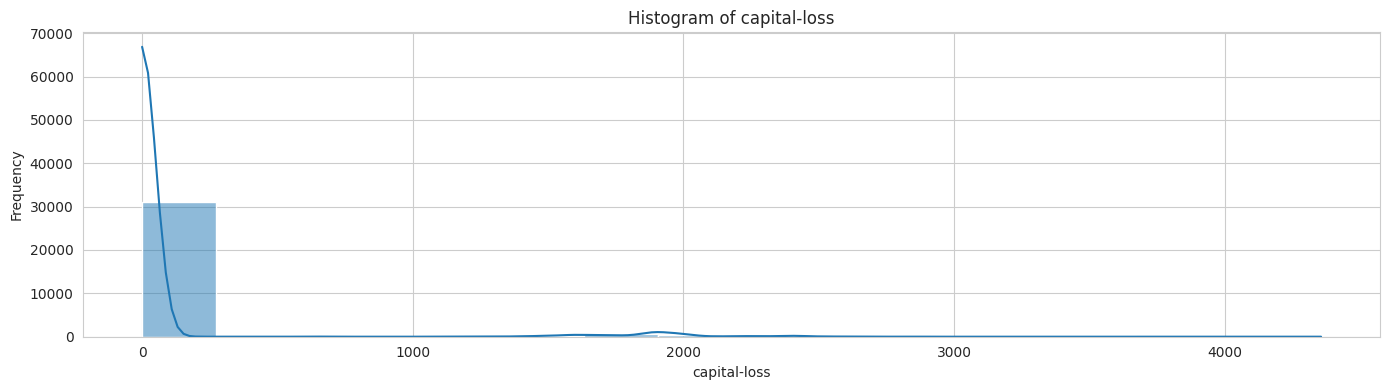

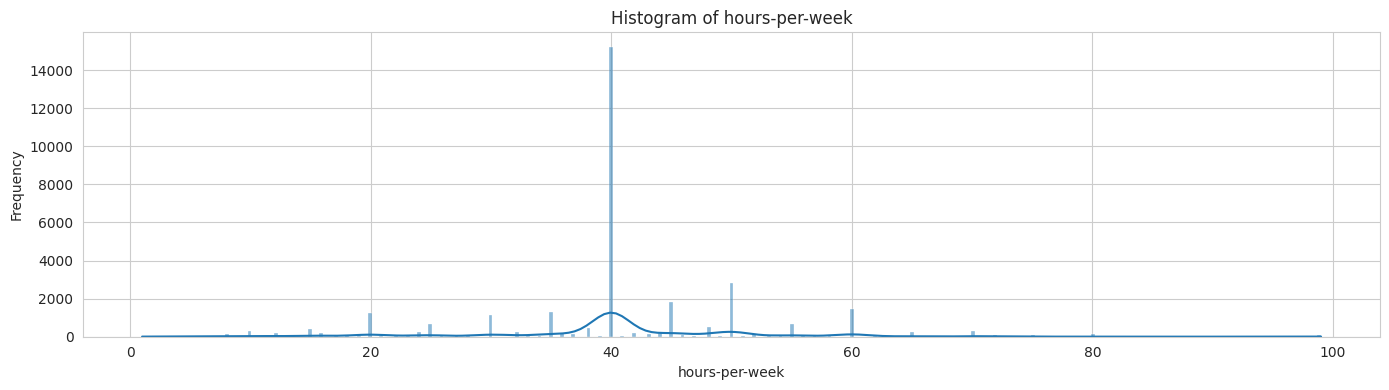

In [7]:
# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(14, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

#### Boxplots

##### What We Are Doing
We will create boxplots for each numerical variable. Boxplots display the median, quartiles, and potential outliers, providing a clear view of the data's spread and variability.

##### Why We Are Doing This
Boxplots are essential because:
- They provide a visual summary of the distribution's central tendency and dispersion.
- They help identify potential outliers.
- They allow for quick comparison across different numerical variables.

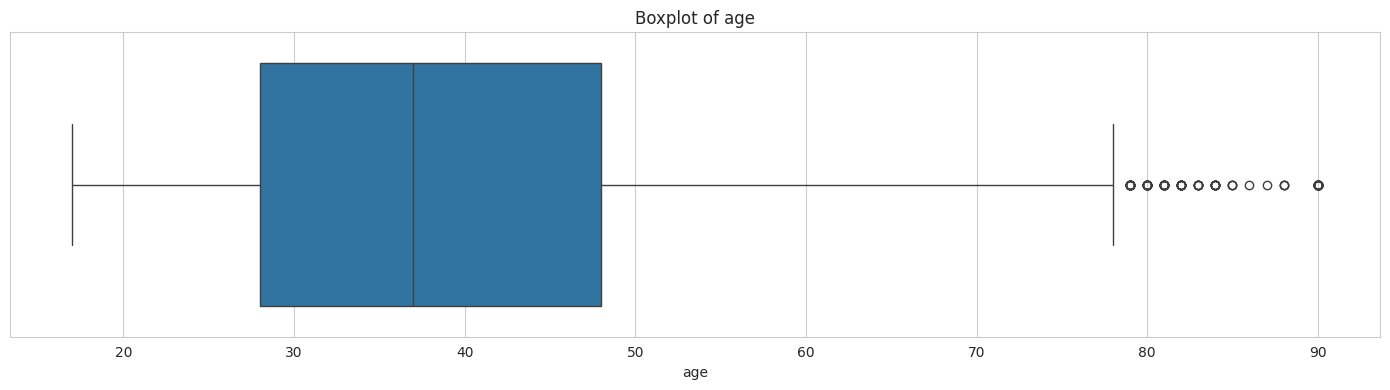

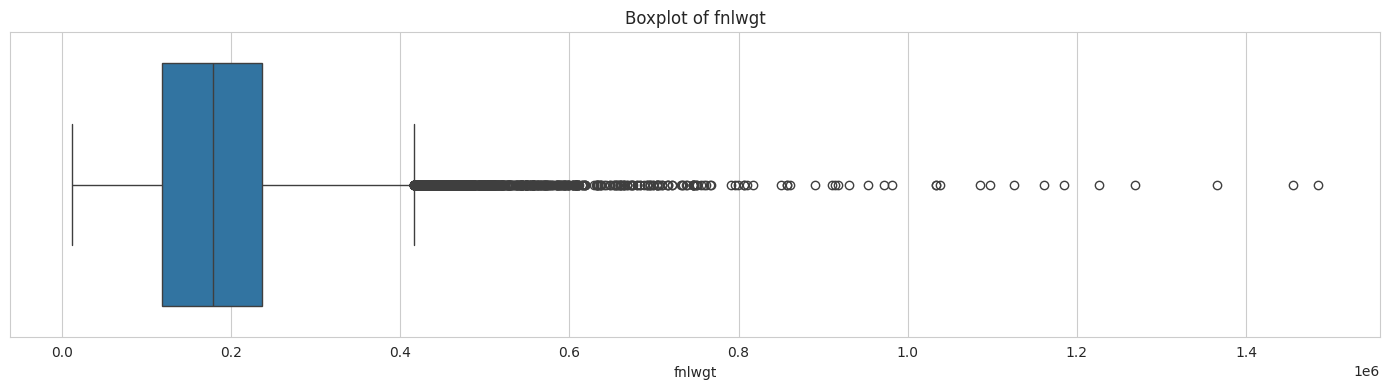

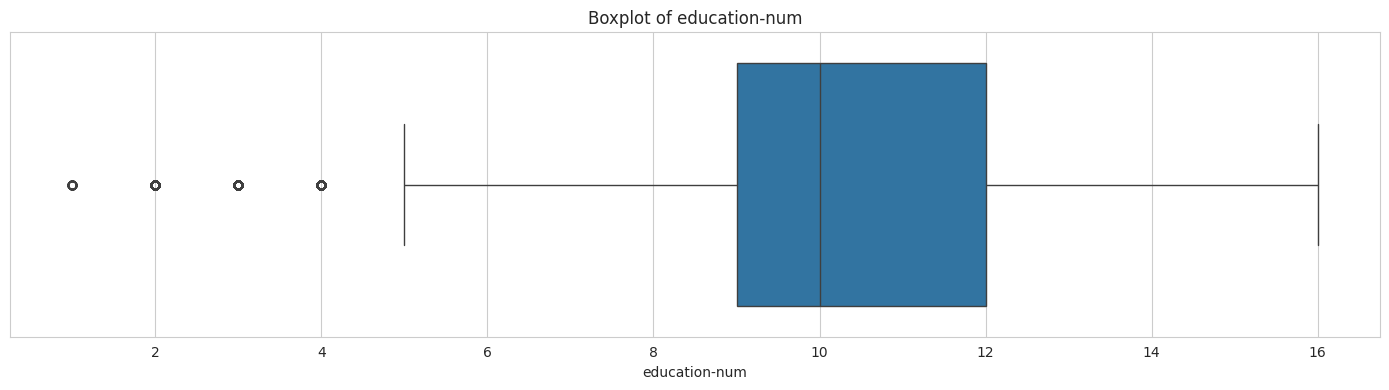

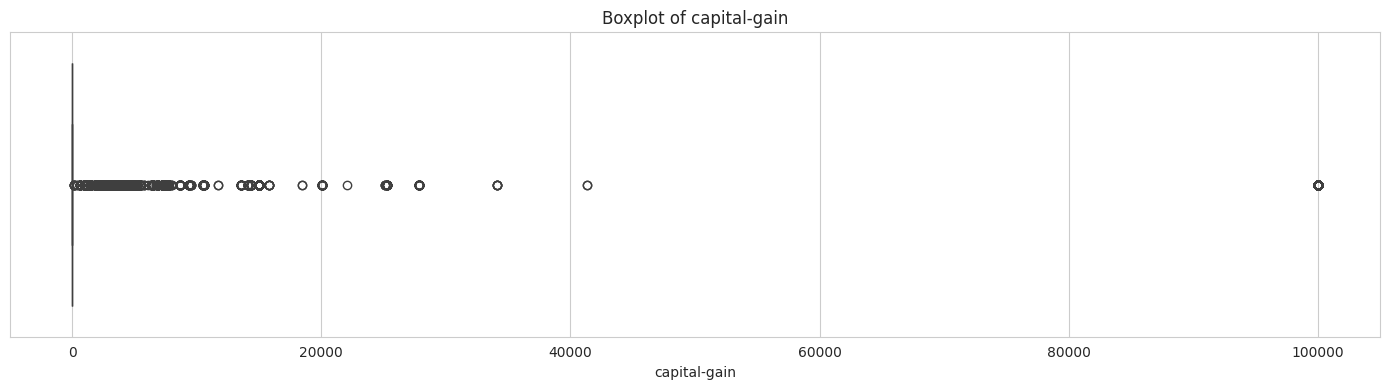

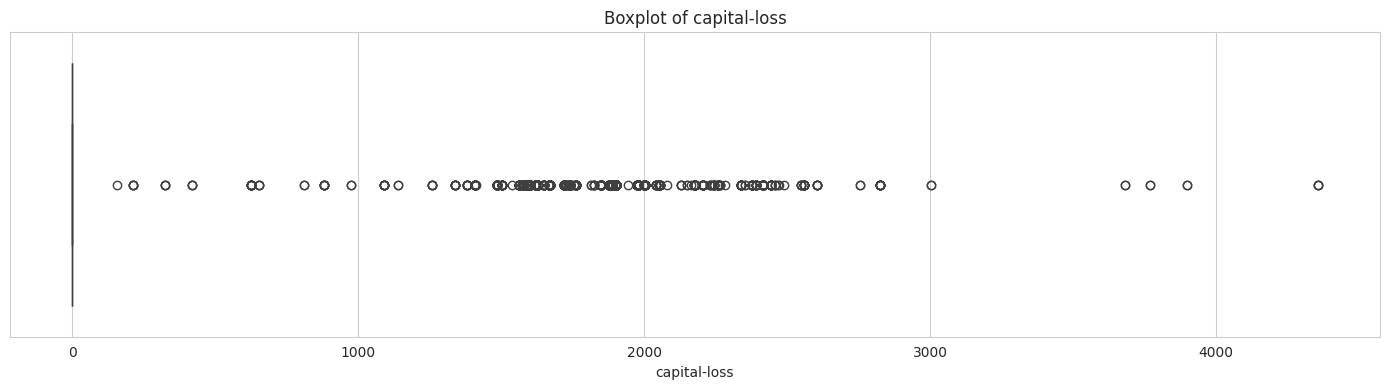

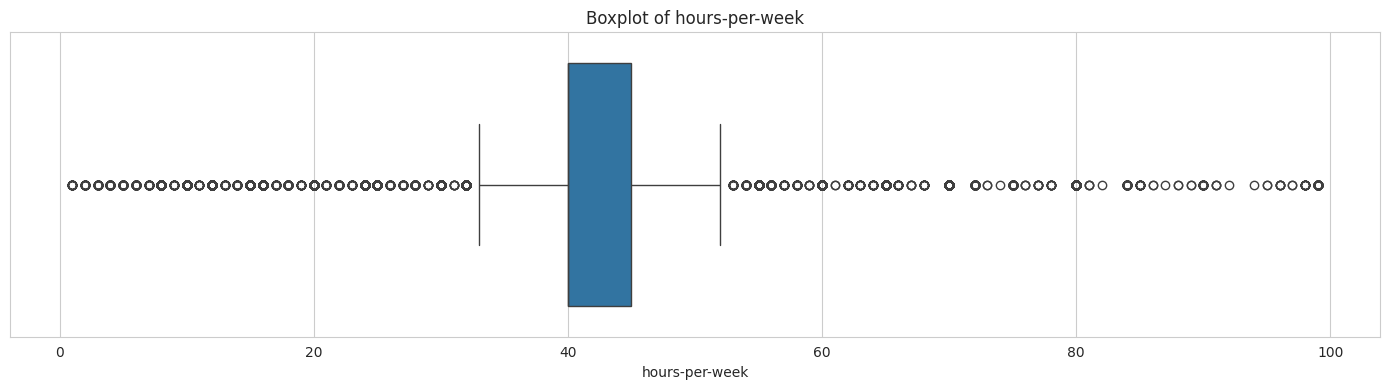

In [8]:
# Plot boxplots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(14, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

#### Frequency Counts for Categorical Variables

##### What We Are Doing
We will calculate the frequency counts for each categorical variable. This provides a tabular summary of how many times each category appears in the dataset.

##### Why We Are Doing This
Frequency counts are essential because:
- They help us understand the distribution of categories.
- They reveal any imbalance or rarity in the categorical data.
- They form the basis for further visualisations like bar charts.


In [9]:
# Print frequency counts for each categorical column
for col in categorical_columns:
    print(f"Frequency counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Frequency counts for workclass:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Frequency counts for education:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


Frequency counts for marital-status:
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name:

#### Bar Charts for Categorical Variables

##### What We Are Doing
We will create bar charts for each categorical variable to visualise the frequency distribution. Bar charts provide a quick visual insight into the data's categorical distribution.

##### Why We Are Doing This
Bar charts are important because:
- They make it easy to see which categories dominate.
- They allow for quick comparisons between different groups.
- They are useful for spotting data anomalies or imbalances in category frequencies.

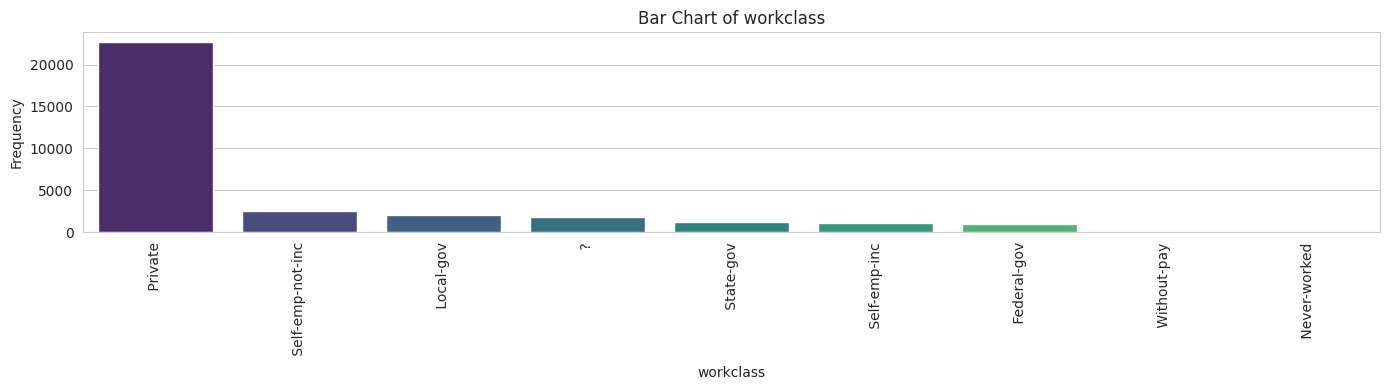

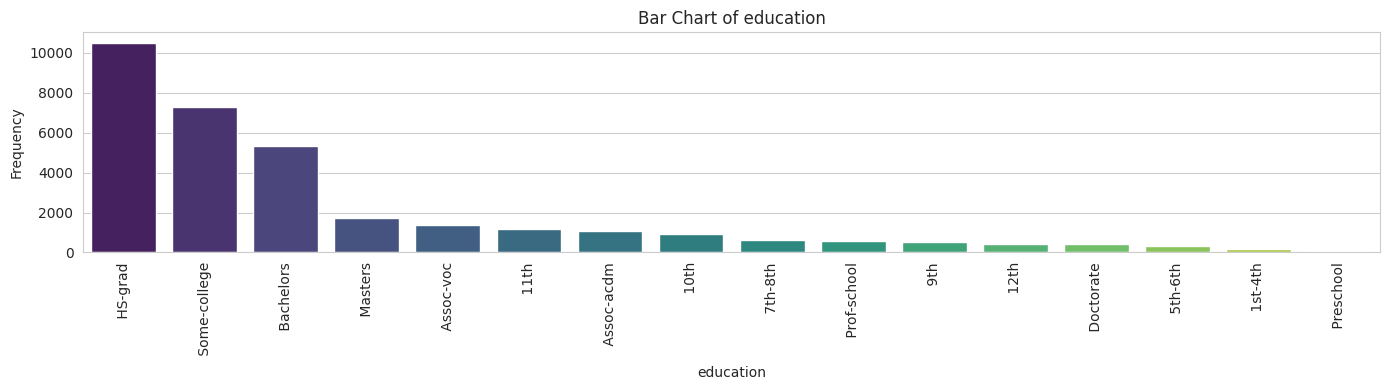

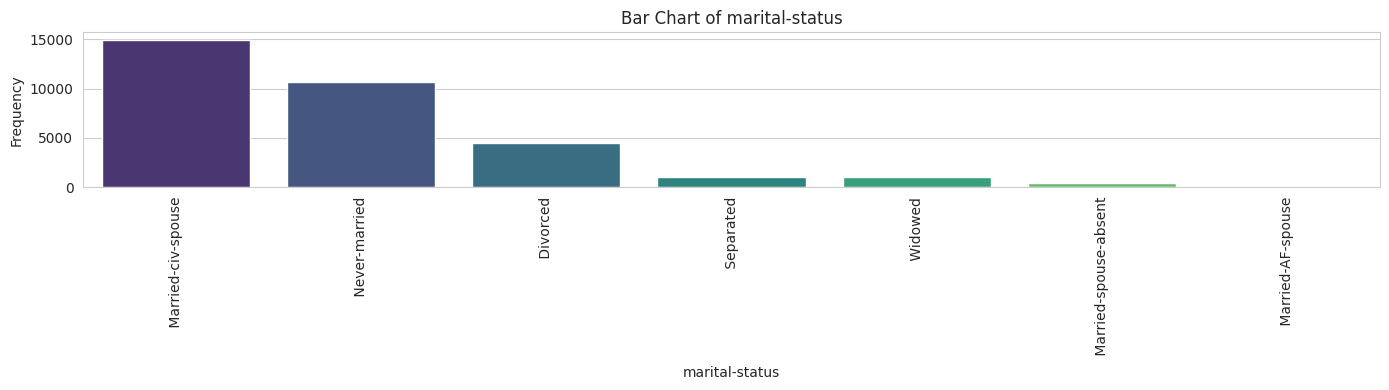

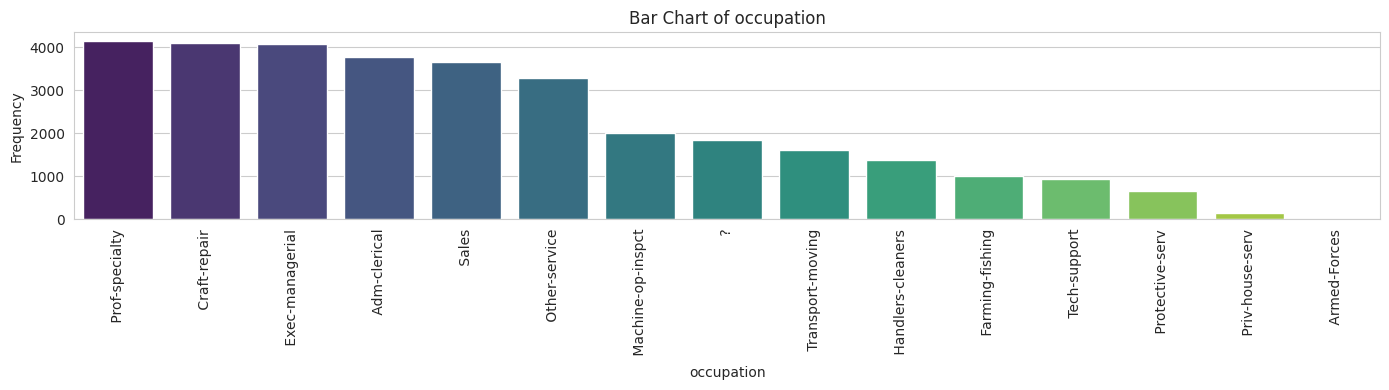

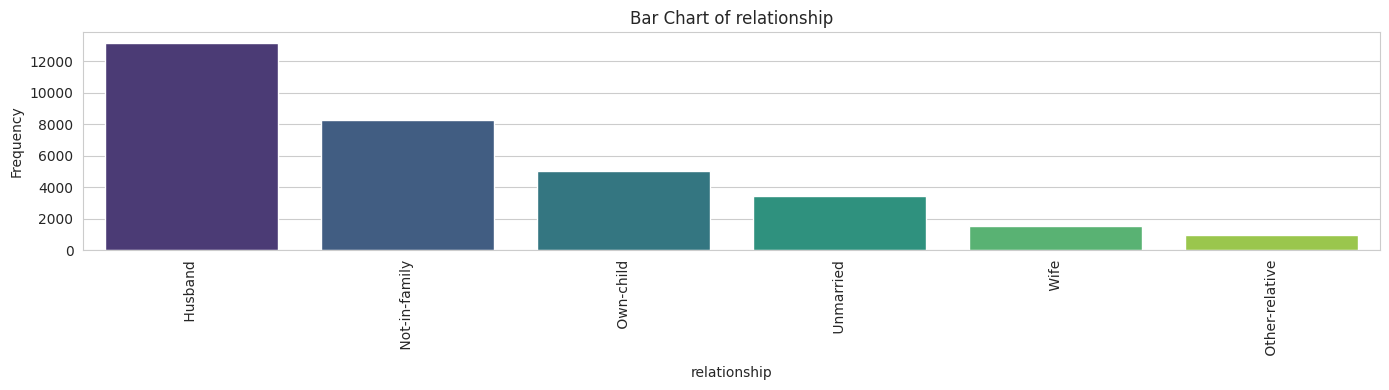

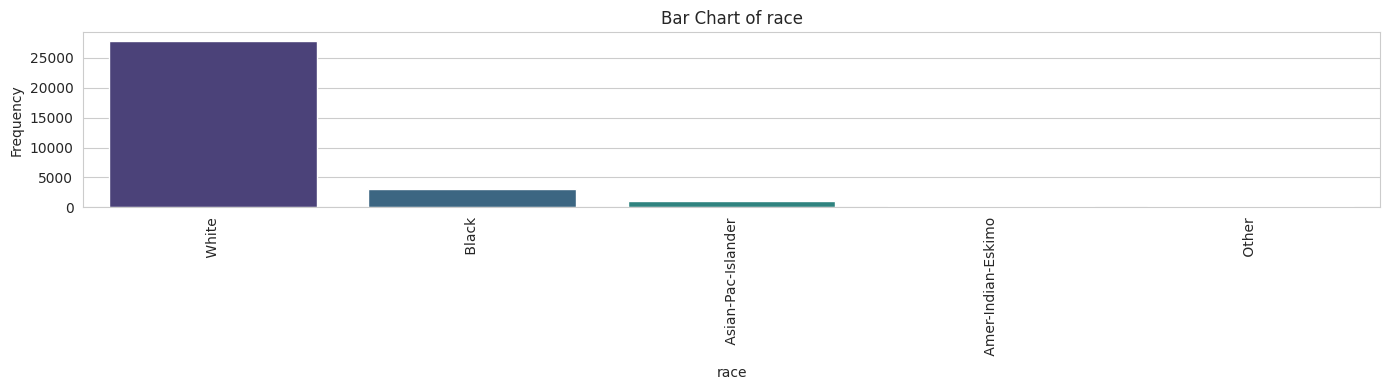

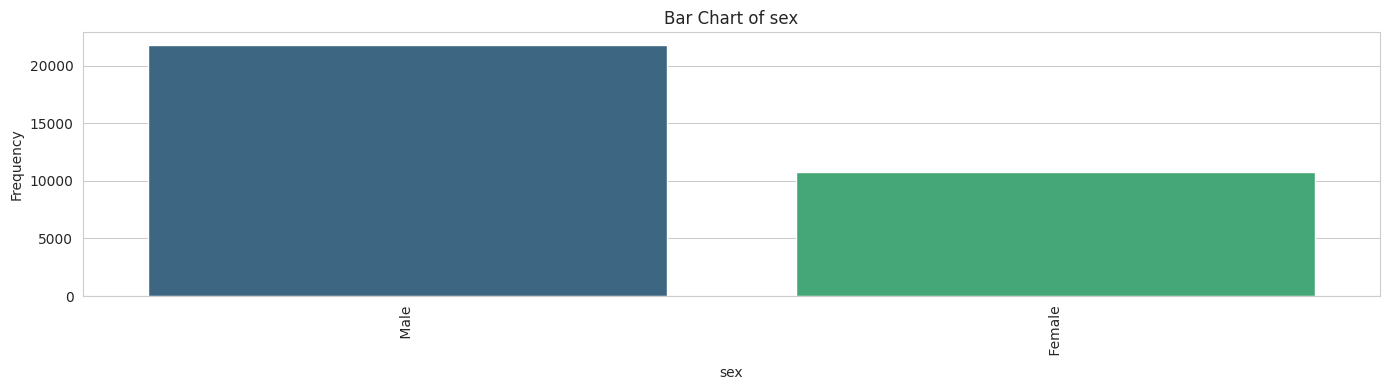

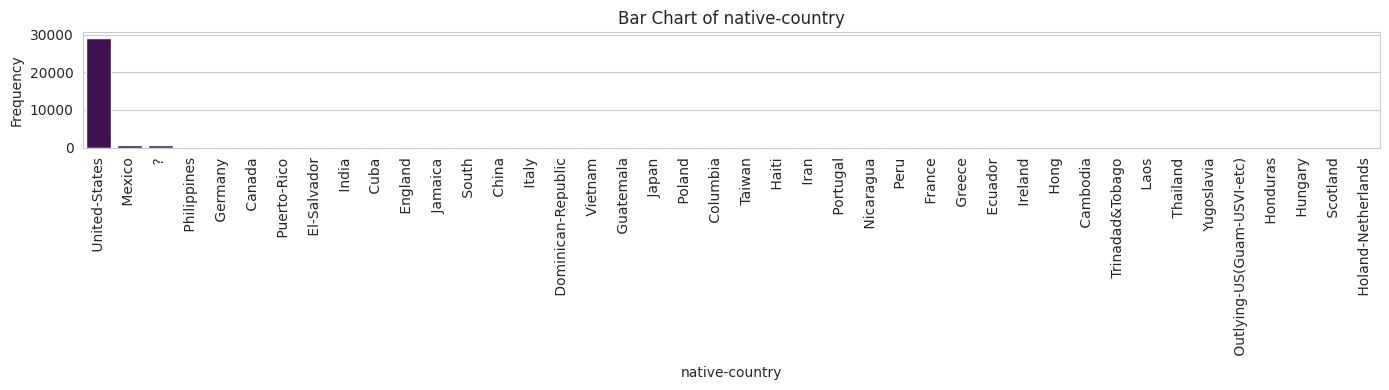

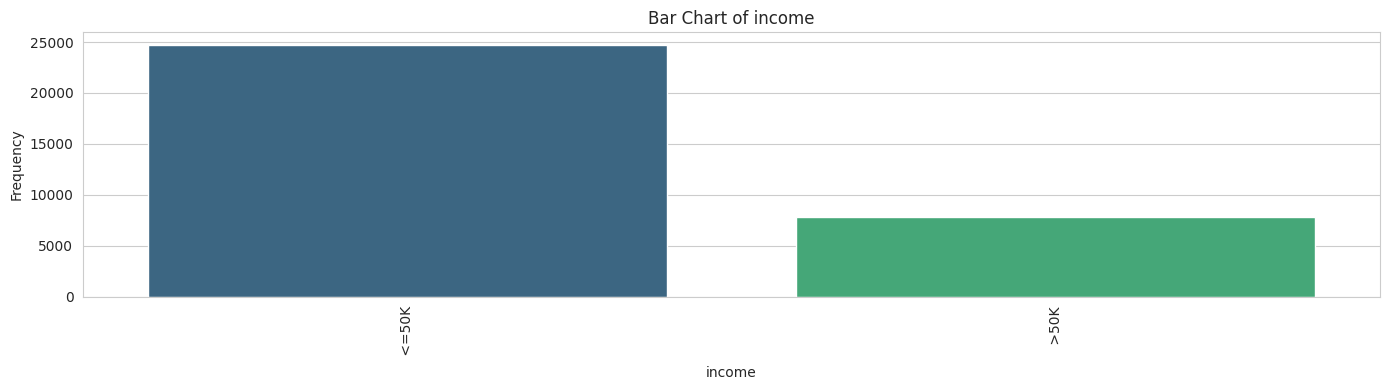

In [10]:
# Plot bar charts for each categorical column
# num_cats = len(categorical_columns)

for col in categorical_columns:
    plt.figure(figsize=(14, 4))
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette="viridis")
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## 3. Bivariate Analysis

### What We Are Doing
In this section, we will explore the relationships between pairs of variables. Examples of visualisations we may use include:
- **Scatter plots** to visualise the relationship between two numerical variables.
- **Boxplots** to compare the distribution of a numerical variable across different categories.
- **Stacked bar charts** to examine how the distribution of one categorical variable differs across another.

### Why We Are Doing This
Bivariate analysis helps uncover relationships and patterns between two variables:
- **Numerical vs. Numerical:** Scatter plots help identify trends, clusters, and potential correlations between variables.
- **Numerical vs. Categorical:** Boxplots reveal differences in distribution across categories, highlighting variations or potential outliers.
- **Categorical vs. Categorical:** Stacked bar charts provide insights into how categories are distributed within another category, helping identify patterns or imbalances.

These visualisations provide a solid foundation for further statistical and predictive analyses.


#### Scatter Plots for Numerical Variables

##### What We Are Doing
We will create scatter plots to examine the relationship between pairs of numerical variables. This helps in visualizing potential trends, patterns, or linear associations between variables.

##### Why We Are Doing This
Scatter plots allow us to:
- Observe the direction and strength of relationships.
- Detect clusters, trends, or outliers in the data.
- Inform subsequent analyses, such as correlation or regression.


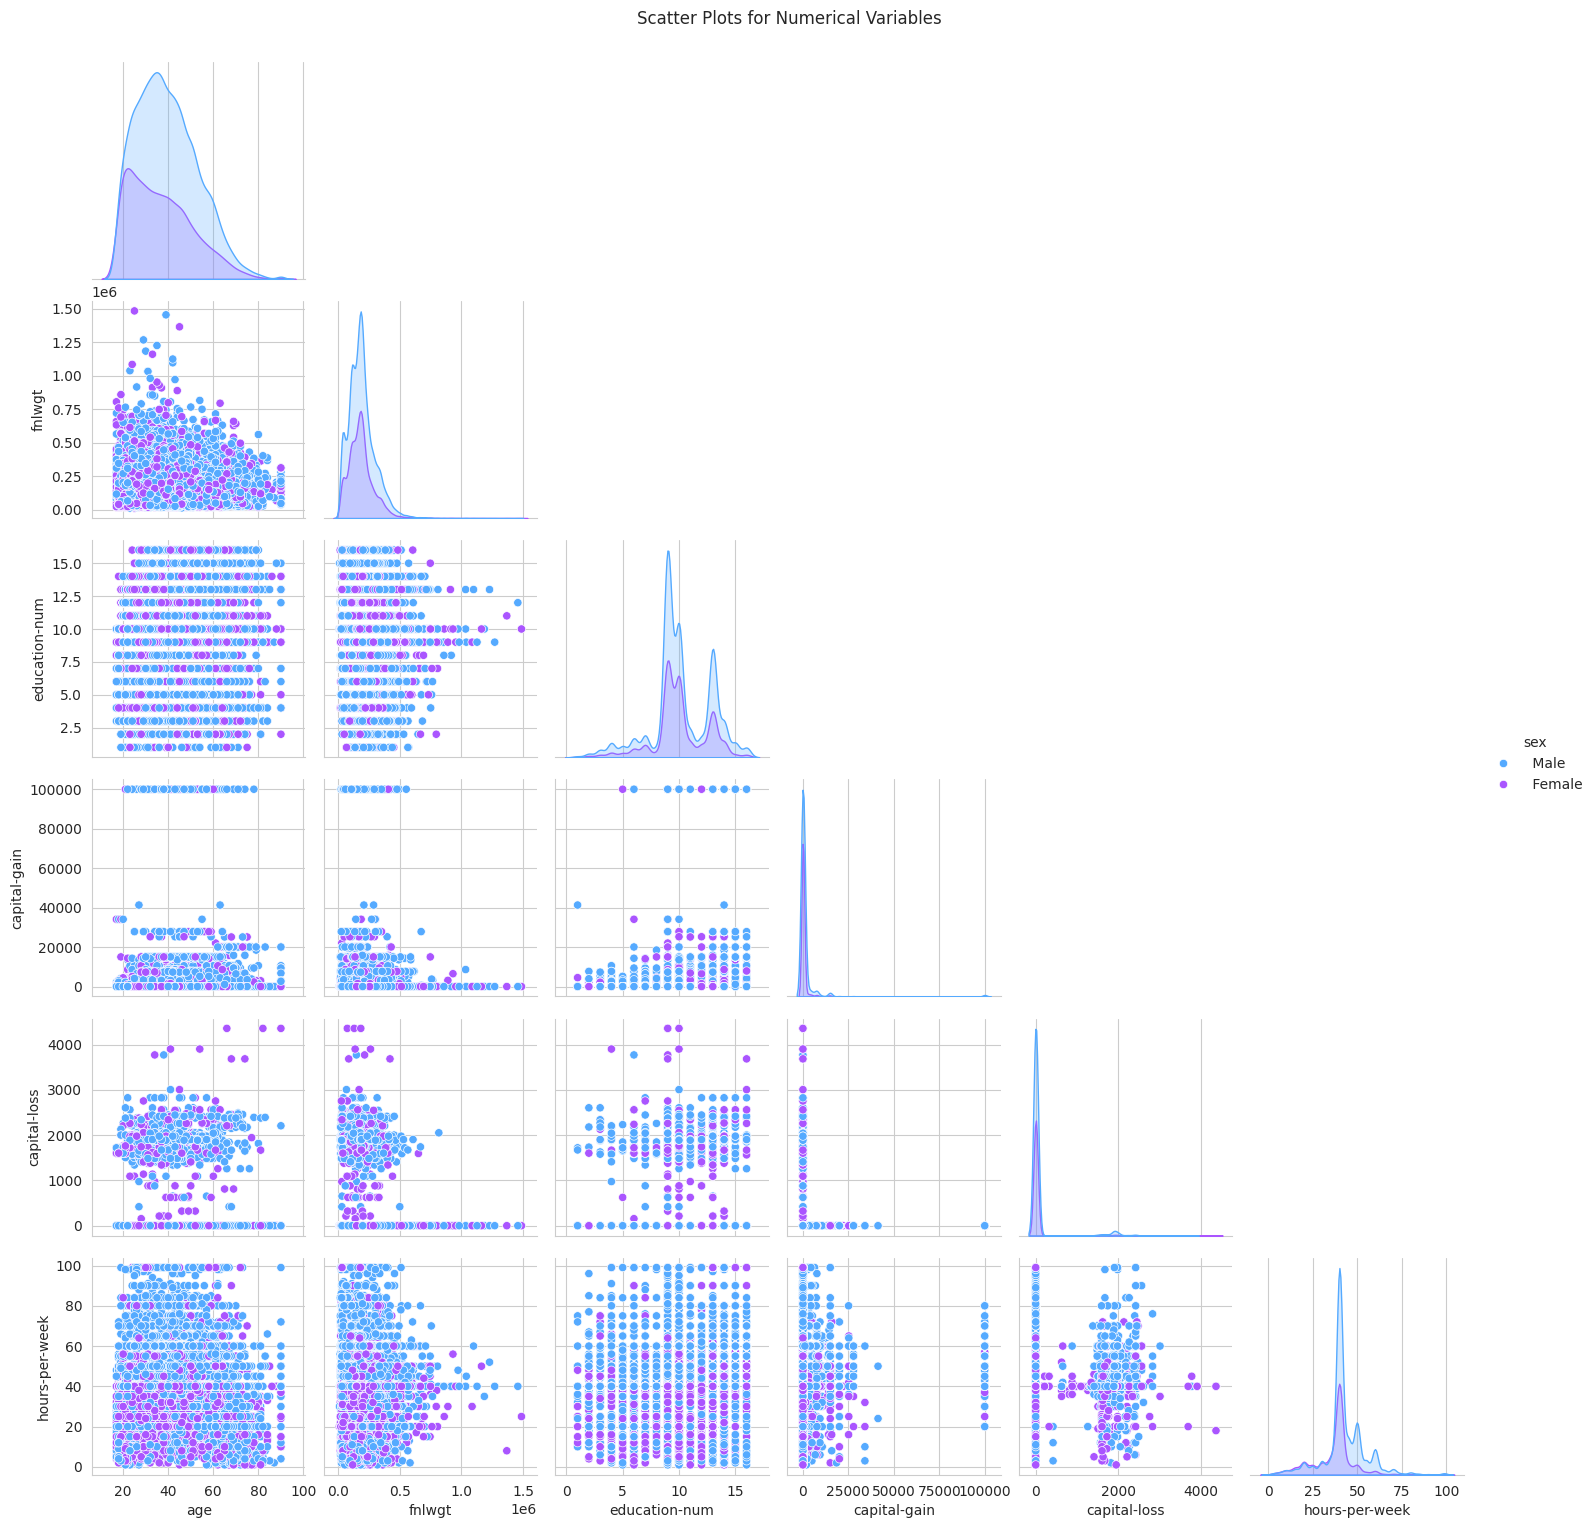

In [11]:
# Using Seaborn's pairplot to create scatter plots for all numerical variables
sns.pairplot(
    diag_kind="kde",
    hue="sex",
    palette="cool",
    corner=True,
    data=df,
)
plt.suptitle("Scatter Plots for Numerical Variables", y=1.02)
plt.show()

#### Side-by-Side Boxplots

##### What We Are Doing
We will create boxplots to visualise the distribution of numerical variables across different categories. This enables us to compare the central tendency and variability for each group.

##### Why We Are Doing This
Side-by-side boxplots help to:
- Compare medians, quartiles, and spread of numerical data across categorical groups.
- Identify differences in distribution and detect outliers.
- Understand how a numerical variable is affected by categorical segmentation.

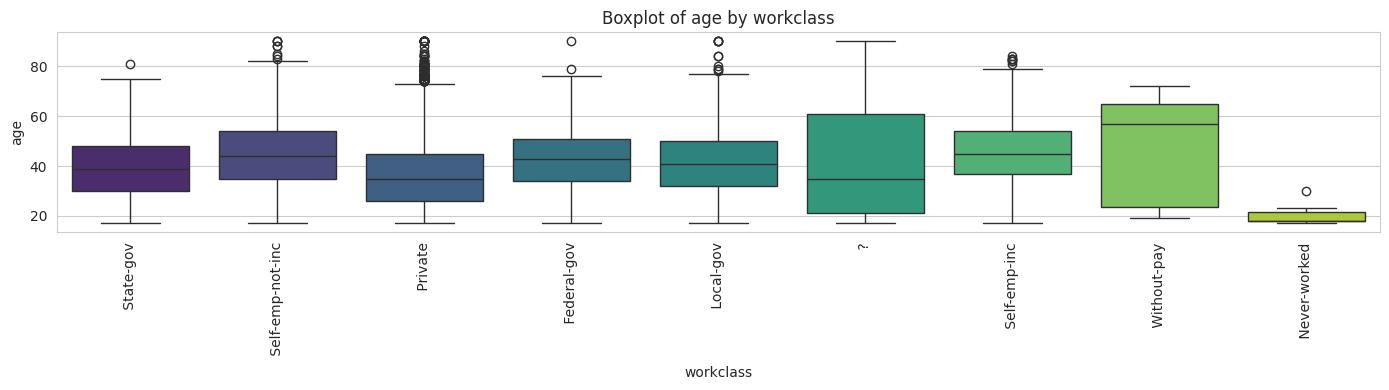

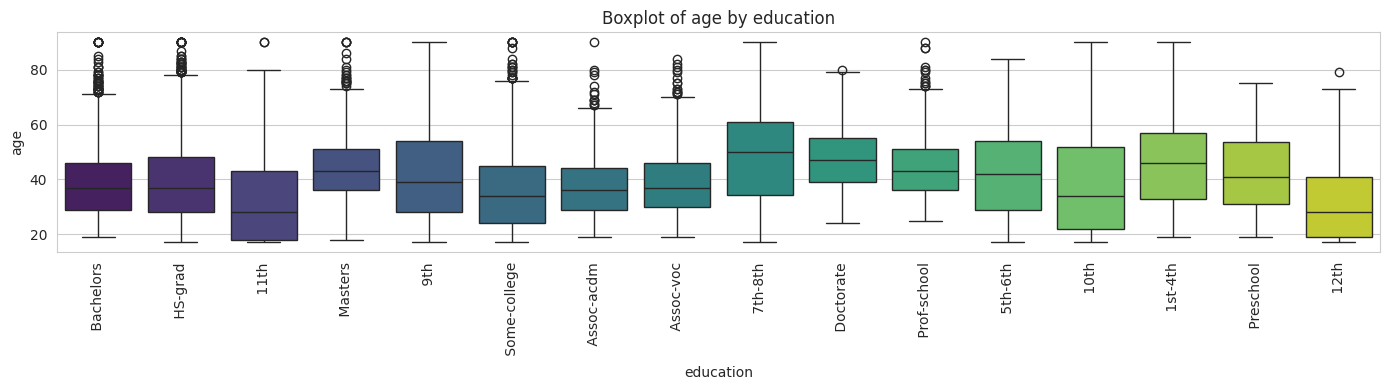

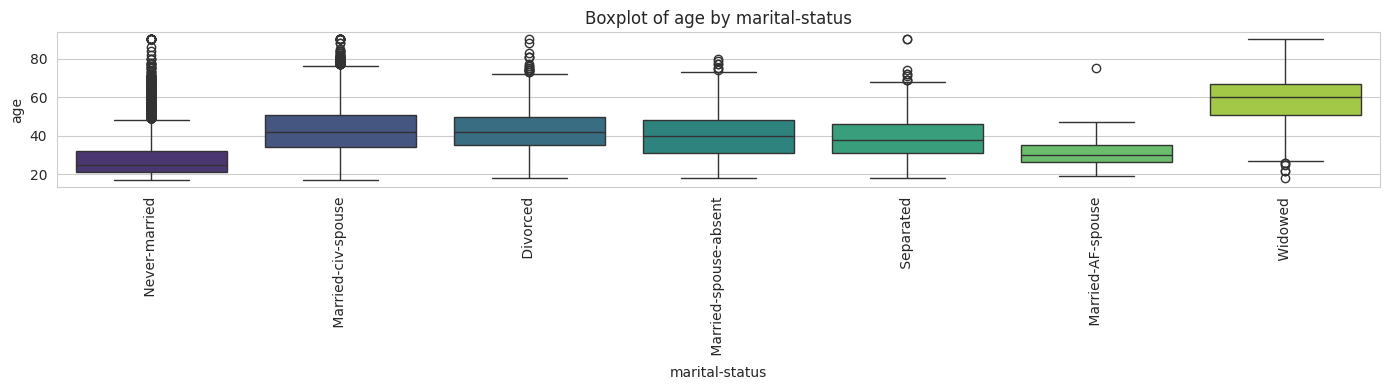

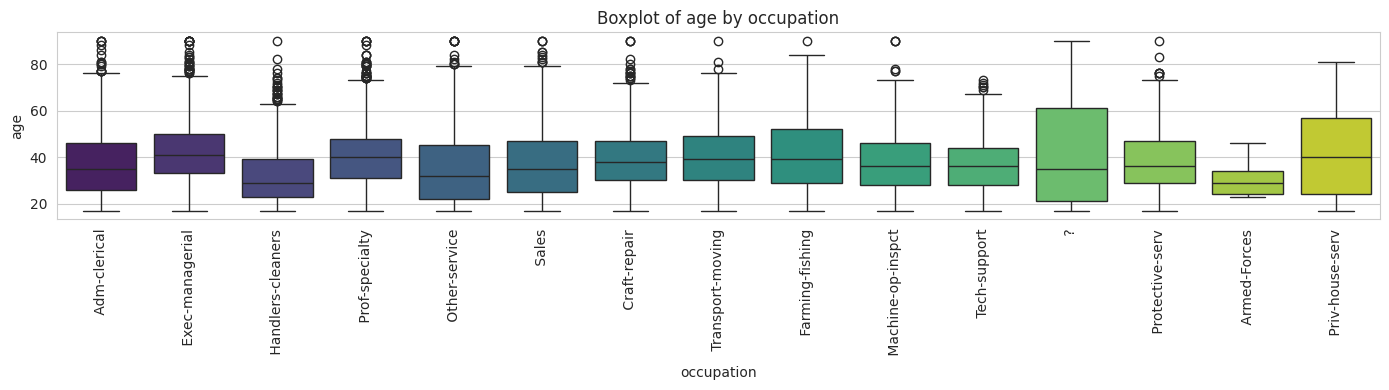

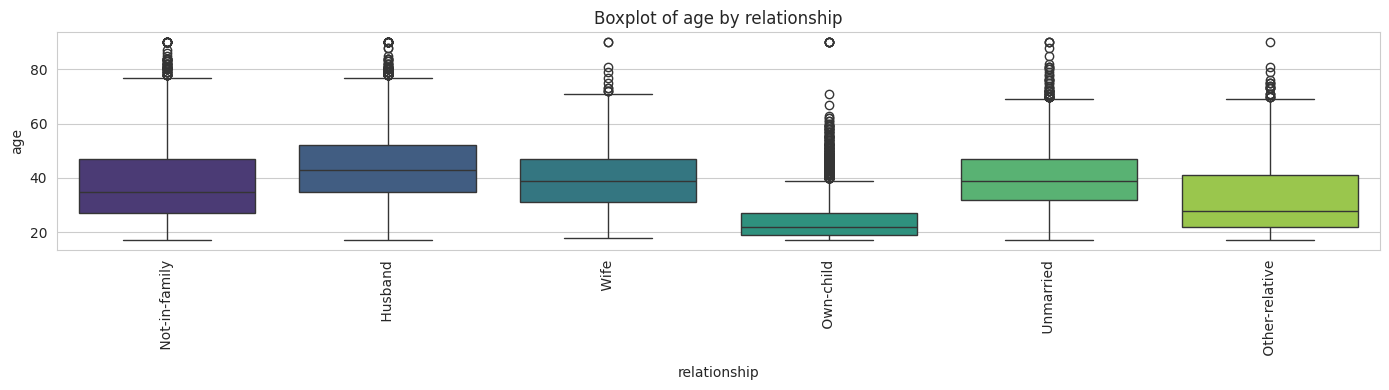

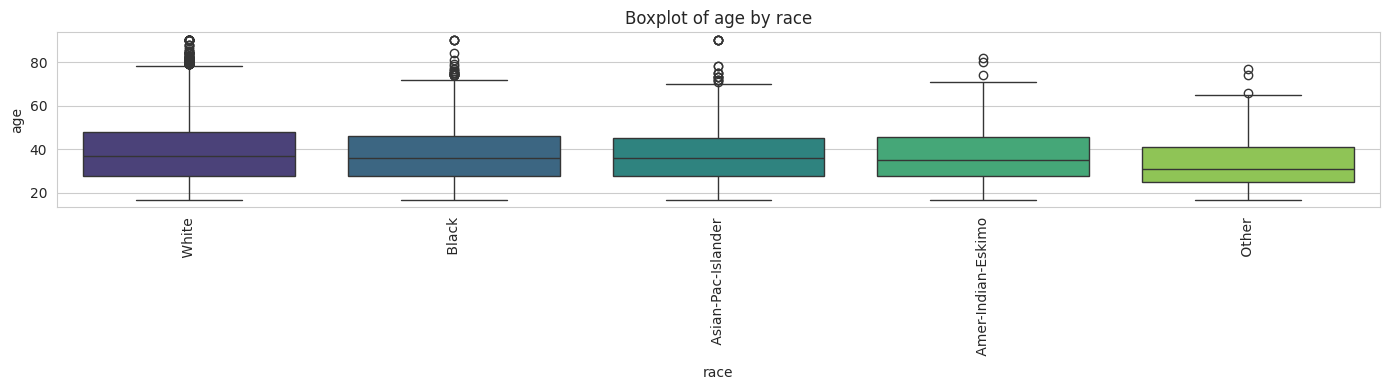

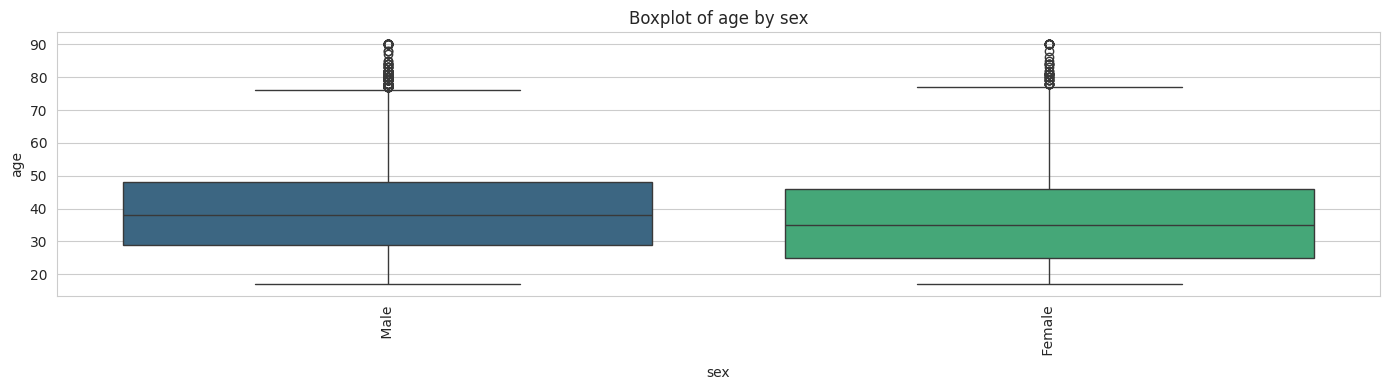

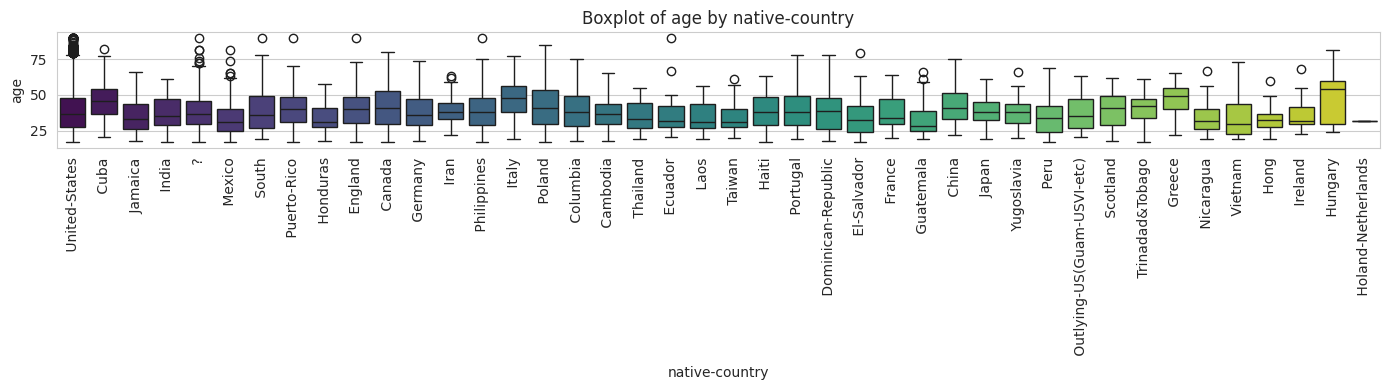

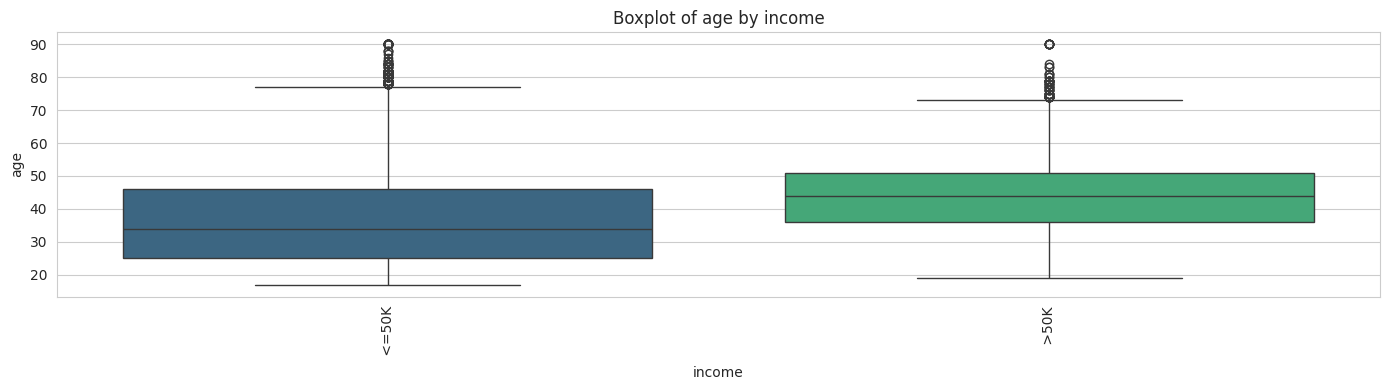

In [12]:
# Loop through each categorical variable and create a boxplot for a selected numerical variable
selected_numerical = "age"
for idx, cat in enumerate(categorical_columns):
    plt.figure(figsize=(14, 4))
    sns.boxplot(x=df[cat], y=df[selected_numerical], hue=df[cat], palette="viridis")
    plt.title(f"Boxplot of {selected_numerical} by {cat}")
    plt.xlabel(cat)
    plt.ylabel(selected_numerical)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

#### Stacked Bar Charts for Categorical Variables

##### What We Are Doing
We will create stacked bar charts to visualise the joint distribution of two categorical variables. This visualization displays how the counts of one categorical variable are distributed within the levels of another categorical variable.

##### Why We Are Doing This
Stacked bar charts are valuable because they:
- Reveal the composition of categories within another categorical variable.
- Help identify any imbalance or patterns in categorical relationships.
- Complement frequency counts by adding an extra dimension of categorical comparison.


In [13]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

education  10th  11th  12th  1st-4th  5th-6th  7th-8th  9th  Assoc-acdm  \
income                                                                    
<=50K       871  1115   400      162      317      606  487         802   
>50K         62    60    33        6       16       40   27         265   

education  Assoc-voc  Bachelors  Doctorate  HS-grad  Masters  Preschool  \
income                                                                    
<=50K           1021       3134        107     8826      764         51   
>50K             361       2221        306     1675      959          0   

education  Prof-school  Some-college  
income                                
<=50K              153          5904  
>50K               423          1387  


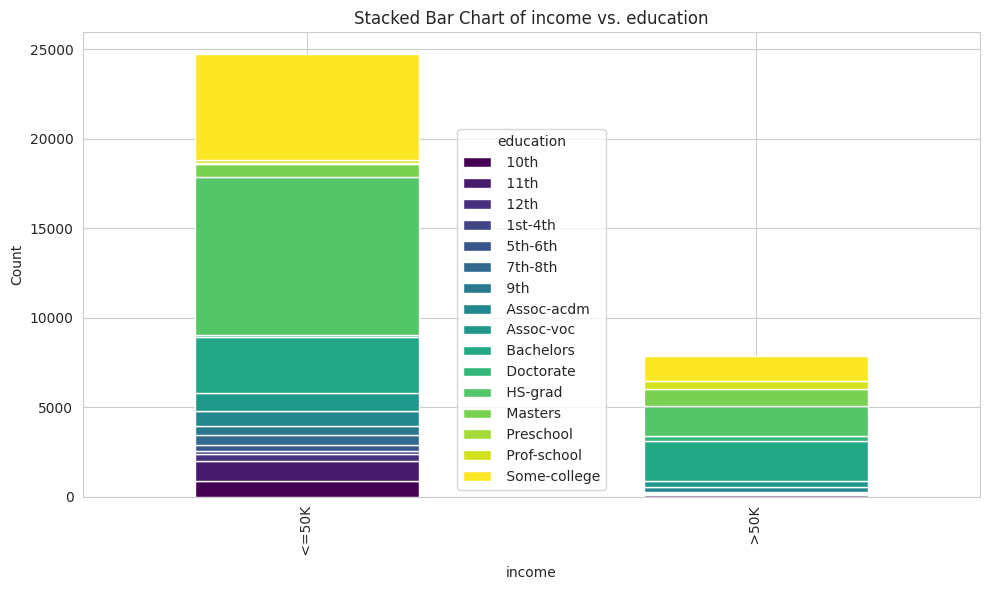

In [14]:
cat_var1 = "income"
cat_var2 = "education"

# Create a cross-tabulation of the two variables
crosstab = pd.crosstab(df[cat_var1], df[cat_var2])
print(crosstab)

# Plot a stacked bar chart using the crosstab data
crosstab.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title(f"Stacked Bar Chart of {cat_var1} vs. {cat_var2}")
plt.xlabel(cat_var1)
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title=cat_var2)
plt.tight_layout()
plt.show()

### Heatmaps for Categorical vs. Categorical Variables

#### What We Are Doing
We will create heatmaps to visualise the frequency of combinations of two categorical variables. This will allow us to see how often different category pairs occur.

#### Why We Are Doing This
Heatmaps are useful for:
- Highlighting relationships or patterns between two categorical variables.
- Providing a visual overview of the joint distribution across category combinations.
- Identifying potential associations or imbalances that may warrant further investigation.


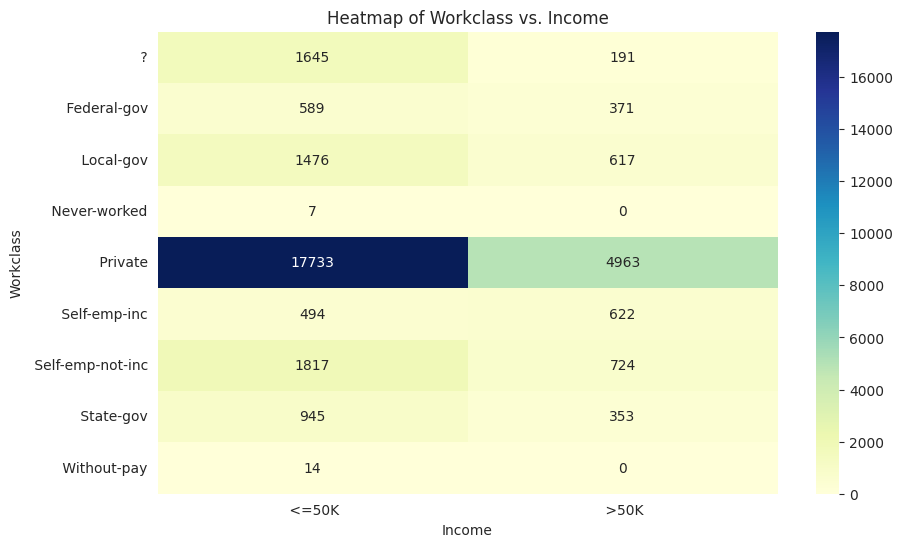

In [15]:
# Create a cross-tabulation of two categorical variables
crosstab = pd.crosstab(df["workclass"], df["income"])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Heatmap of Workclass vs. Income")
plt.xlabel("Income")
plt.ylabel("Workclass")
plt.show()

### 3.5 Correlation Analysis

#### What We Are Doing
In this section, we will calculate and visualise the correlation between numerical variables. We will:
- Compute correlation coefficients (e.g., Pearson’s r) to quantify the strength and direction of relationships.
- Visualise the correlation matrix using a heatmap for an overview of how variables are interrelated.

#### Why We Are Doing This
Correlation analysis helps us:
- **Quantify Relationships:** Determine the strength and direction (positive or negative) of the linear association between variables.
- **Inform Further Analysis:** Identify strongly correlated variables, which can inform feature selection or highlight potential multicollinearity.
- **Visual Overview:** Use a heatmap to quickly spot patterns, trends, and relationships across multiple variables.


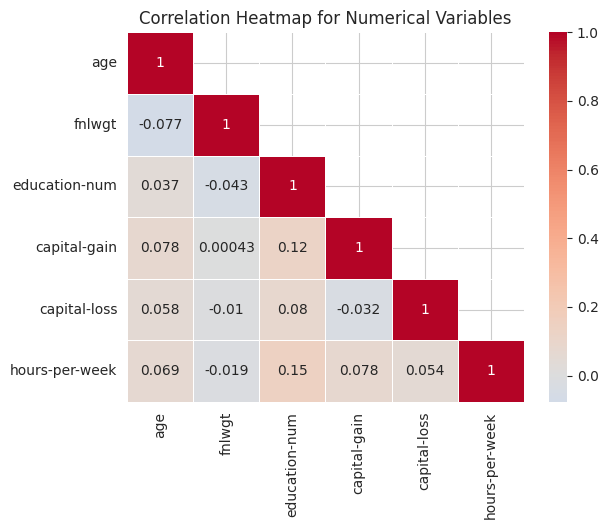

In [16]:
# Calculate the correlation matrix for numerical variables
correlation_matrix = df[numerical_columns].corr(method="pearson")

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    mask=mask,
    linewidths=0.7,
    center=0,
)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

## 4. Multivariate Analysis

### What We Are Doing
In this section, we explore relationships involving three or more variables simultaneously. Examples include:
- **3D Scatter Plots:** Visualize relationships between three numerical variables.
- **Group-wise Summary:** Compute summary statistics across groups to understand variable interactions.

### Why We Are Doing This
Multivariate analysis deepens our understanding of the dataset by:
- **Revealing Complex Interactions:** Showing how multiple variables interact and influence each other.
- **Informing Feature Engineering:** Identifying groups and clusters that can guide model building.
- **Enhancing Data Insights:** Offering a more comprehensive view of the data structure and underlying patterns.

#### 3D Scatter Plots

##### What We Are Doing
We will create 3D scatter plots to visualise the relationships among three numerical variables. This adds an extra dimension to our analysis, making it easier to detect clusters or trends that are not apparent in 2D plots.

##### Why We Are Doing This
3D scatter plots help us:
- Visualise interactions among three variables simultaneously.
- Identify clusters, outliers, or trends that might be hidden in two-dimensional views.
- Enhance our understanding of the data’s multi-dimensional structure.

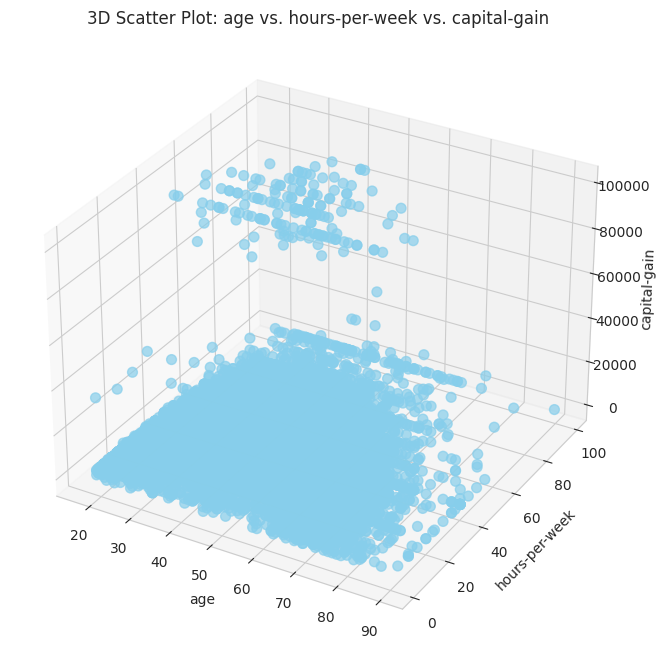

In [17]:
# Select three numerical variables for the 3D scatter plot
x_var = "age"
y_var = "hours-per-week"
z_var = "capital-gain"  # Example variable; adjust as needed

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the 3D scatter
ax.scatter(df[x_var], df[y_var], df[z_var], c="skyblue", s=50, alpha=0.7)
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title(f"3D Scatter Plot: {x_var} vs. {y_var} vs. {z_var}")

plt.show()

#### Group-wise Summary

##### What We Are Doing
We will compute summary statistics for numerical variables grouped by a categorical variable. This analysis reveals how different groups compare in terms of central tendency, dispersion, and other measures.

##### Why We Are Doing This
Group-wise summaries help us:
- Understand the differences between groups.
- Identify trends or patterns that vary across categories.
- Provide insights that can inform further analysis or feature engineering.

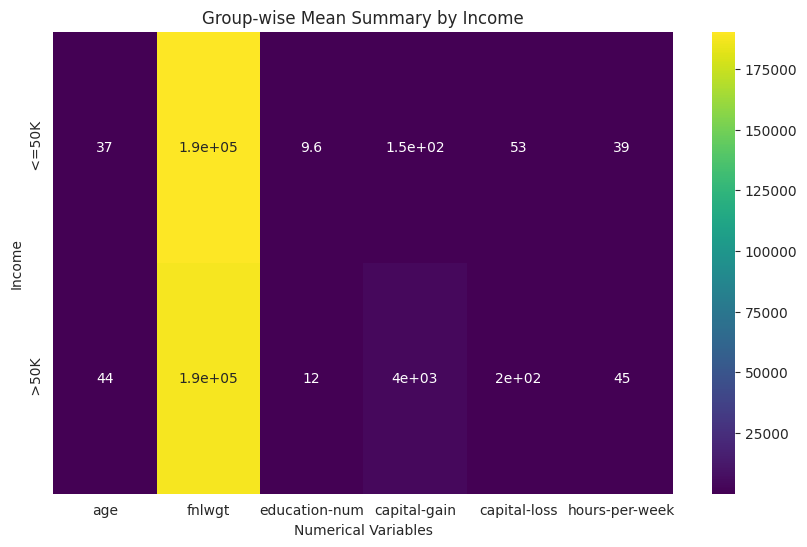

In [18]:
# Example: Compute group-wise means for numerical variables based on a categorical variable (e.g., income)
grouped_summary = df.groupby("income")[numerical_columns].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(grouped_summary, annot=True, cmap="viridis")
plt.title("Group-wise Mean Summary by Income")
plt.xlabel("Numerical Variables")
plt.ylabel("Income")
plt.show()

## 5. Clustering and Grouping for EDA

### What We Are Doing
In this section, we will apply clustering techniques to identify natural groupings within our dataset. For example, we can use:
- **K-Means Clustering:** To partition the data into a specified number of clusters based on selected numerical features.
- **Hierarchical Clustering:** To build a tree of clusters that can reveal relationships at different levels of granularity.
  
These techniques help us understand the structure of the data and can guide further feature engineering or modeling.

### Why We Are Doing This
Clustering and grouping are valuable for exploratory analysis because they:
- **Reveal Hidden Patterns:** Identify groups of observations that behave similarly.
- **Support Segmentation:** Aid in segmenting the data for more tailored analyses.
- **Inform Feature Engineering:** Provide insights that may lead to the creation of new features or the refinement of existing ones.


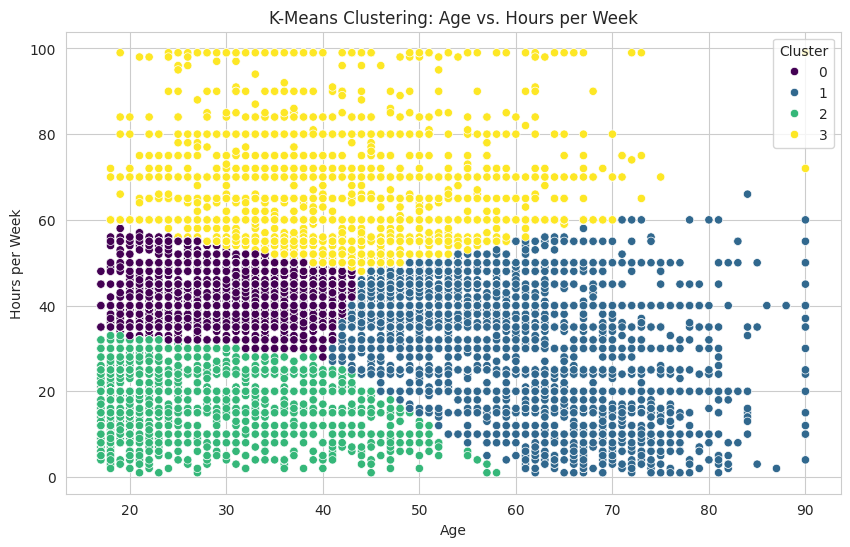

In [19]:
# Select numerical features for clustering
clustering_features = df[['age', 'hours-per-week']]

# Standardize the features for better clustering performance
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Apply K-Means clustering with a chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels to the dataframe
df['cluster'] = clusters

# Visualize the clusters using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', hue='cluster', data=df, palette='viridis')
plt.title("K-Means Clustering: Age vs. Hours per Week")
plt.xlabel("Age")
plt.ylabel("Hours per Week")
plt.legend(title='Cluster')
plt.show()

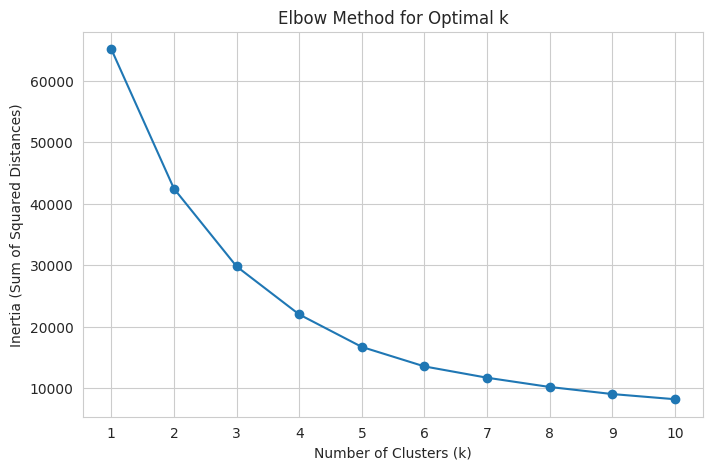

In [20]:
# Define range of k values to test
k_values = range(1, 11)
inertia_values = []

# Fit K-Means for each k and record inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_features)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia_values, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal k")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [21]:
df["cluster"] = kmeans.labels_

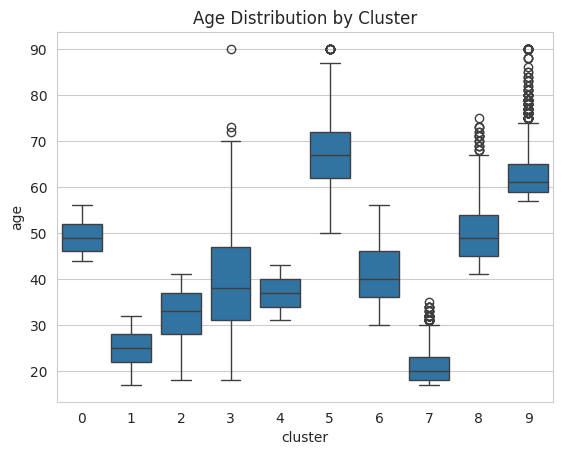

In [22]:
sns.boxplot(x="cluster", y="age", data=df)
plt.title("Age Distribution by Cluster")
plt.show()

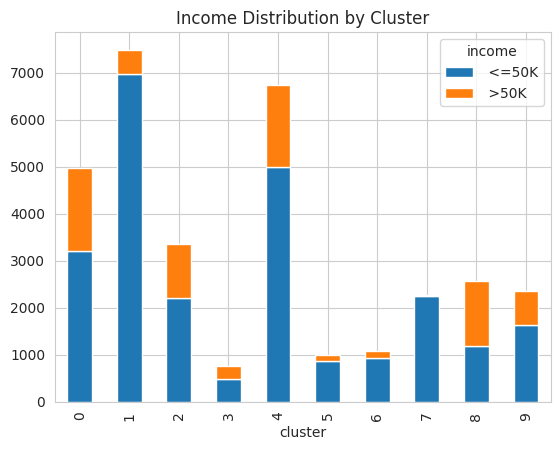

In [23]:
pd.crosstab(df["cluster"], df["income"]).plot(kind="bar", stacked=True)
plt.title("Income Distribution by Cluster")
plt.show()

## 6. Principal Component Analysis (PCA)

### What We Are Doing
In this section, we will:
- Perform **Principal Component Analysis (PCA)** to reduce dimensionality.
- Visualize high-dimensional data in 2D or 3D space.
- Analyze how different variables contribute to the variance in our dataset.

### Why We Are Doing This
PCA is useful in EDA because:
- **Simplifies Complexity:** High-dimensional data can be difficult to interpret; PCA projects it onto a lower-dimensional space while retaining as much information as possible.
- **Finds Patterns:** It helps uncover relationships between variables and detect clusters or anomalies.
- **Speeds Up Modeling:** Reducing the number of features can improve computational efficiency for machine learning models.


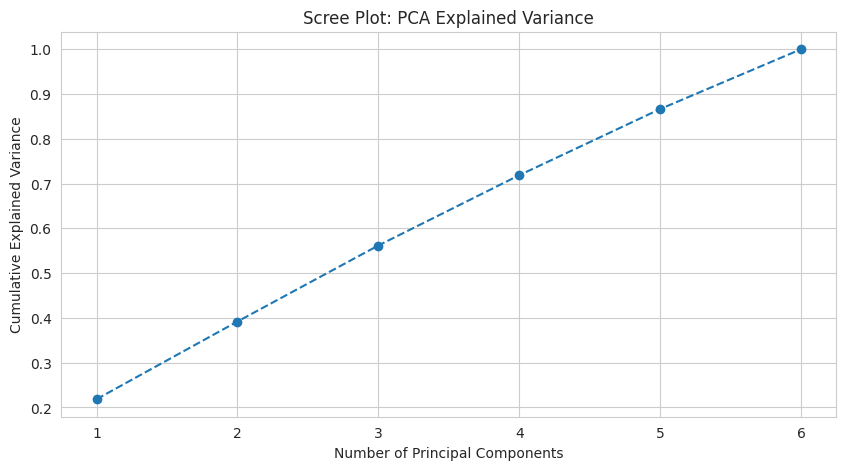

In [24]:
# Standardise the data (PCA works best when features are scaled)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_columns])

# Apply PCA
pca = PCA(n_components=len(numerical_columns))  # Same number as input features
pca_result = pca.fit_transform(df_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Create a Scree Plot (Explained Variance Plot)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot: PCA Explained Variance")
plt.grid(True)
plt.show()


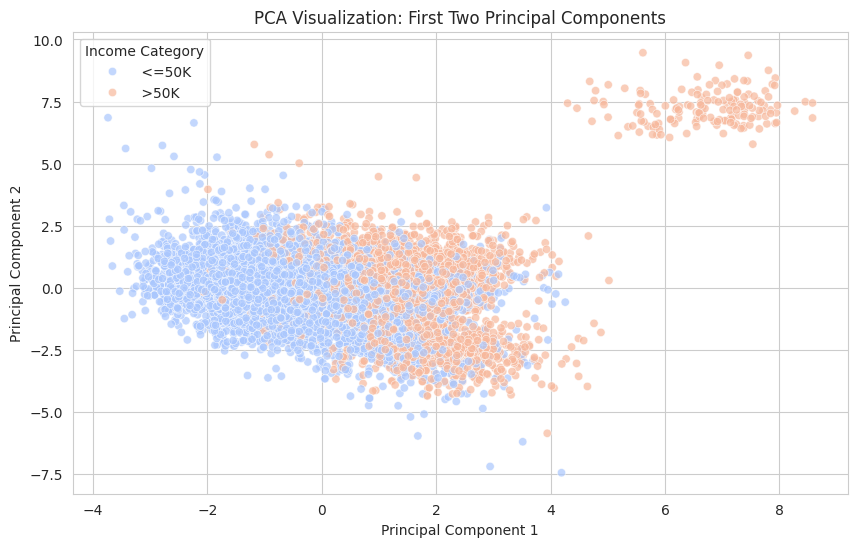

In [25]:
# Convert PCA results into a DataFrame for visualization
pca_df = pd.DataFrame(pca_result[:, :2], columns=["PC1", "PC2"])
pca_df["Income"] = df["income"]  # Color by income category

# Scatter plot of first two principal components
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Income", alpha=0.7, palette="coolwarm")
plt.title("PCA Visualization: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Income Category")
plt.show()

### Key Observations
- If only **2-3 components** explain most of the variance, we can visualise the data in a **2D or 3D scatter plot**.
- We can analyze the **PCA loadings** to understand which features contribute most to each component.
- A **high absolute value** in PCA loadings means that a feature strongly influences that principal component.
- If **capital-gain** and **education-num** dominate PC1, then PC1 represents an axis of financial and educational factors.
- This helps us **interpret patterns** in the dataset without looking at individual features separately.


In [26]:
# Get PCA loadings (importance of each feature in the components)
loadings = pd.DataFrame(pca.components_, columns=numerical_columns, index=[f"PC{i+1}" for i in range(len(numerical_columns))])

# Display the first two principal components' loadings
print("Feature Contributions to Principal Components:\n")
loadings.iloc[:2]

Feature Contributions to Principal Components:



,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
PC1,0.383371,-0.210343,0.550855,0.414996,0.267103,0.511640
PC2,-0.351764,0.541144,0.178370,0.523746,-0.509014,0.134925


## 7. Feature Importance Using Random Forest

### What We Are Doing
- Feature importance helps us understand which variables contribute the most to predicting income. 
- We use Random Forest, an ensemble learning method, to rank features based on their predictive power.

### Why We Are Doing This
- Handles both numerical and categorical features well.
- Captures nonlinear relationships.
- Provides feature importance scores directly.
- Robust to noise and outliers.


In [27]:
# Encode categorical variables
df_encoded = df.apply(
    lambda x: LabelEncoder().fit_transform(x) if x.dtype == "object" else x
)

# Define features and target
X = df_encoded.drop(columns=["income"])  # Features
y = df_encoded["income"]  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": importances}
)
feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

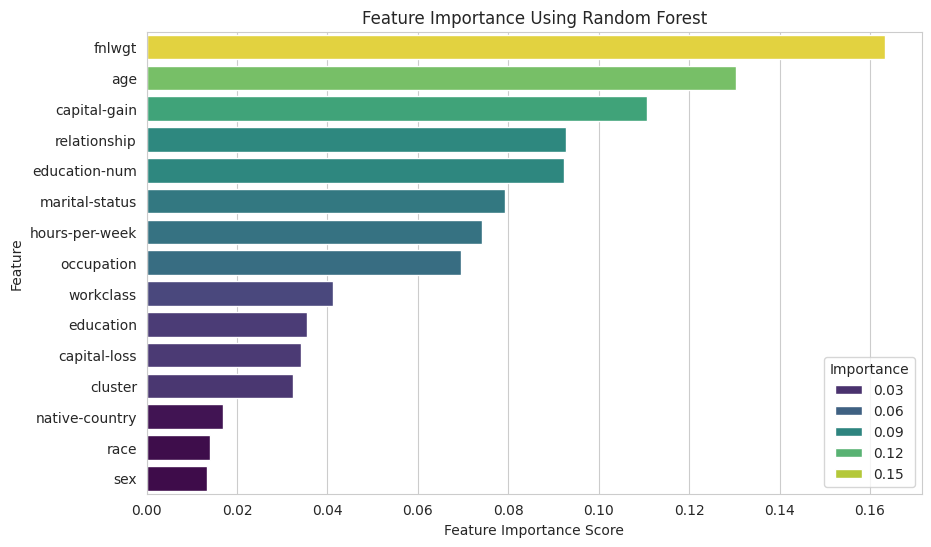

In [28]:
# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df["Importance"], y=feature_importance_df["Feature"], hue=feature_importance_df["Importance"], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance Using Random Forest")
plt.show()

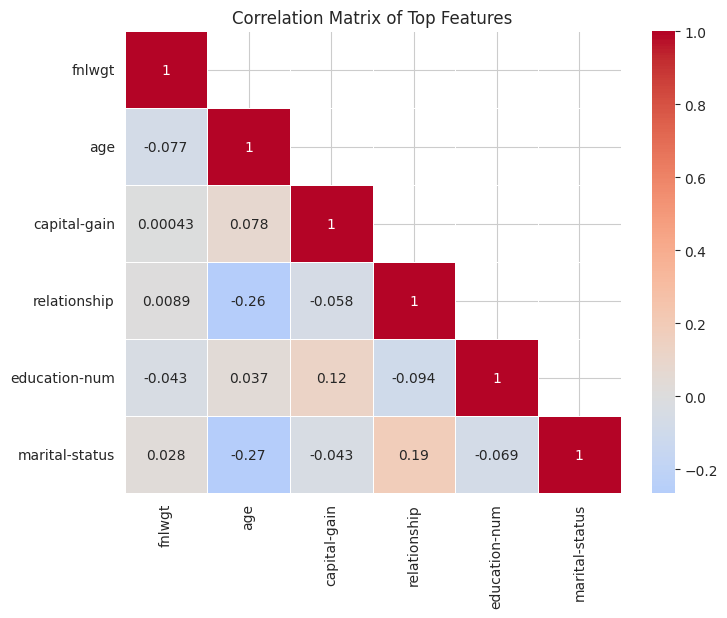

In [29]:
# Select only the top 6 most important features
top_features = feature_importance_df["Feature"].head(6).values

# Compute correlation matrix
correlation_matrix = df_encoded[top_features].corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    mask=mask,
    linewidths=0.7,
    center=0,
)
plt.title("Correlation Matrix of Top Features")
plt.show()

## 8. Hypothesis Testing & Statistical Inference

### What We Are Doing
In this section, we introduce hypothesis testing, a key statistical method for validating patterns in our data. We will:
- **Define null (H₀) and alternative (H₁) hypotheses.**
- **Understand significance levels (α) and p-values.**
- **Lay the foundation for statistical tests that follow (e.g., t-tests, chi-square, ANOVA).**

### Why We Are Doing This
Hypothesis testing allows us to:
- **Distinguish real patterns from random noise.** Just because two variables seem related does not mean the relationship is statistically significant.
- **Make data-driven decisions.** Helps verify insights before incorporating them into models or decision-making.
- **Ensure statistical rigor.** Provides a structured approach to drawing conclusions from data.

#### Formulating Hypotheses

##### What We Are Doing
We will define hypotheses based on our dataset. Hypothesis testing involves:
- **Null Hypothesis (H₀):** Assumes no effect, no difference, or no association.
- **Alternative Hypothesis (H₁):** Represents the claim we want to test.

##### Why We Are Doing This
Formulating hypotheses ensures that:
- **Our tests have clear objectives.** Without hypotheses, statistical tests lack direction.
- **We avoid false discoveries.** Clearly defining what we are testing prevents misinterpretation.
- **We can determine statistical significance.** Hypothesis tests rely on p-values to assess results.

##### <span style="color: orange;">Example Hypotheses Based on Our Dataset </span>
1. **T-Test Example (Comparing Means)**
   - H₀: There is no difference in average **hours worked per week** between males and females.
   - H₁: Males and females work a significantly different number of hours per week.

2. **Chi-Square Test Example (Categorical Association)**
   - H₀: **Income level** (<=50K or >50K) is independent of **education level**.
   - H₁: Income level is significantly associated with education level.

3. **ANOVA Example (Comparing Multiple Groups)**
   - H₀: The mean **capital gain** is the same across different **marital statuses**.
   - H₁: At least one marital status group has a significantly different capital gain.

#### Significance Levels and p-values

##### What We Are Doing
We will introduce **significance levels (α)** and **p-values**, which are fundamental to hypothesis testing.

##### Why We Are Doing This
Understanding significance levels and p-values helps us:
- **Set criteria for rejecting the null hypothesis.** Common significance levels include 0.05 and 0.01.
- **Interpret statistical test results correctly.** A small p-value (e.g., <0.05) suggests strong evidence against the null hypothesis.
- **Avoid Type I and Type II errors.** Balancing significance levels helps minimise false positives and false negatives.


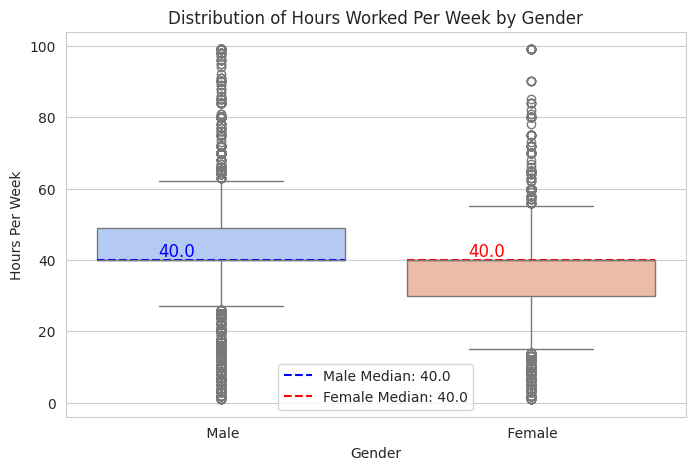

In [30]:
# Example: Independent Samples T-Test (Do males and females work different hours per week?)
male_hours = df[df["sex"] == " Male"]["hours-per-week"]
female_hours = df[df["sex"] == " Female"]["hours-per-week"]

# Calculate medians
median_male = male_hours.median()
median_female = female_hours.median()

plt.figure(figsize=(8, 5))
ax = sns.boxplot(x="sex", y="hours-per-week", hue="sex", data=df, palette="coolwarm")

# Add median lines
ax.axhline(median_male, color="blue", linestyle="--", xmin=0.05, xmax=0.45, label=f"Male Median: {median_male:.1f}")
ax.axhline(median_female, color="red", linestyle="--", xmin=0.55, xmax=0.95, label=f"Female Median: {median_female:.1f}")

# Annotate median values
plt.text(x=-0.2, y=median_male + 1, s=f"{median_male:.1f}", color="blue", fontsize=12)
plt.text(x=0.8, y=median_female + 1, s=f"{median_female:.1f}", color="red", fontsize=12)

plt.title("Distribution of Hours Worked Per Week by Gender")
plt.xlabel("Gender")
plt.ylabel("Hours Per Week")
plt.legend()
plt.show()


In [31]:
t_stat, p_value = stats.ttest_ind(male_hours, female_hours, nan_policy="omit")

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in hours worked between males and females.")
else:
    print("Fail to reject the null hypothesis: No significant difference detected.")


T-Statistic: 42.5095
P-Value: 0.0000
Reject the null hypothesis: There is a significant difference in hours worked between males and females.


### Chi-Square Test: Income Level vs. Education Level

#### What We Are Doing
We will use a **Chi-Square Test** to see if there is an association between two categorical variables:
- **Income level**: `<=50K` or `>50K`
- **Education level**: Various categories such as `Bachelors`, `HS-grad`, `Masters`, etc.

#### Why We Are Doing This
Chi-Square tests help us:
- **Assess Independence**: Determine if two categorical variables are related or independent.
- **Identify Patterns**: Reveal whether certain education levels are more (or less) likely to be associated with a particular income bracket.
- **Guide Further Analysis**: If there is a strong association, we might explore why certain education levels correlate with specific income ranges.


Contingency Table:
 income        <=50K  >50K
education                
10th            871    62
11th           1115    60
12th            400    33
1st-4th         162     6
5th-6th         317    16
7th-8th         606    40
9th             487    27
Assoc-acdm      802   265
Assoc-voc      1021   361
Bachelors      3134  2221
Doctorate       107   306
HS-grad        8826  1675
Masters         764   959
Preschool        51     0
Prof-school     153   423
Some-college   5904  1387


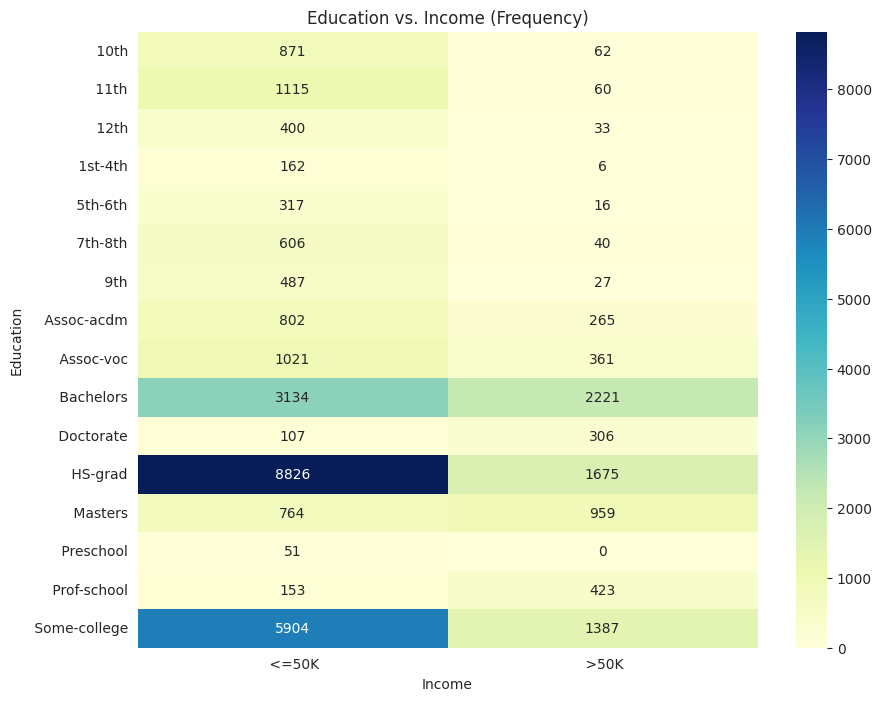

In [32]:
# Create a contingency table (cross-tabulation) for education vs. income
contingency_table = pd.crosstab(df['education'], df['income'])

# Display the contingency table
print("Contingency Table:\n", contingency_table)

# Optional: Visualize the contingency table as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Education vs. Income (Frequency)")
plt.xlabel("Income")
plt.ylabel("Education")
plt.show()

In [33]:
# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:\n", expected)

# Set the significance level
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a relationship between income level and education level.")
else:
    print("Fail to reject the null hypothesis: No relationship detected.")

Chi2 Statistic: 4429.6533
P-Value: 0.0000
Degrees of Freedom: 15
Expected Frequencies:
 [[ 708.3246829   224.6753171 ]
 [ 892.04877     282.95123   ]
 [ 328.72946163  104.27053837]
 [ 127.54399435   40.45600565]
 [ 252.81041737   80.18958263]
 [ 490.43702589  155.56297411]
 [ 390.22388747  123.77611253]
 [ 810.05620221  256.94379779]
 [1049.20119161  332.79880839]
 [4065.46481988 1289.53518012]
 [ 313.54565277   99.45434723]
 [7972.25883726 2528.74116274]
 [1308.08513252  414.91486748]
 [  38.71871257   12.28128743]
 [ 437.29369491  138.70630509]
 [5535.25751666 1755.74248334]]
Reject the null hypothesis: There is a relationship between income level and education level.


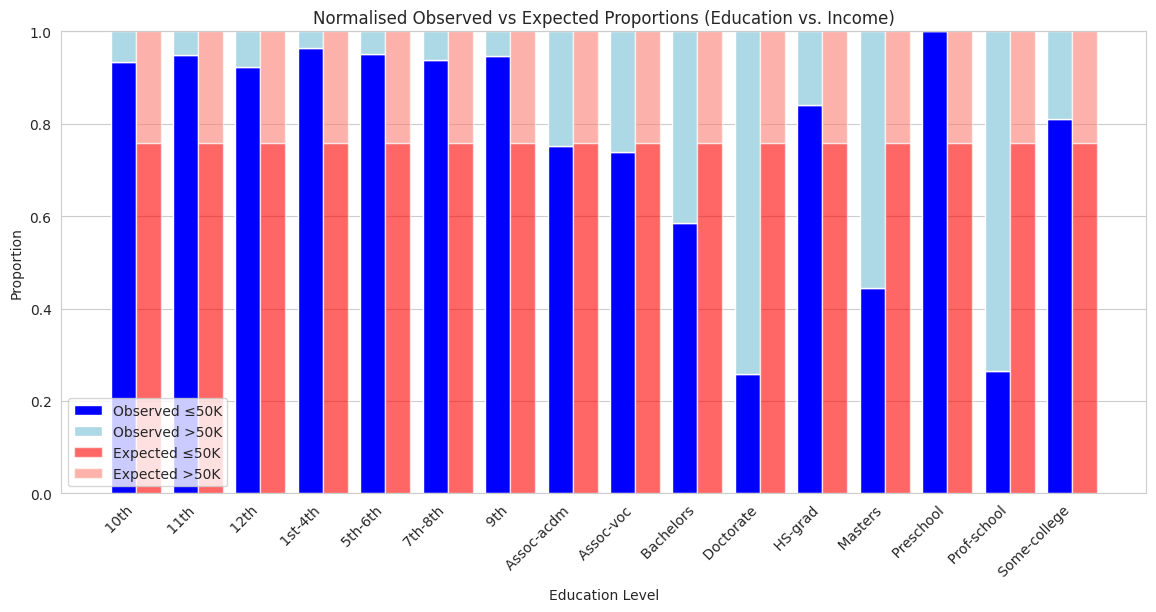

In [34]:
# Convert contingency table and expected frequencies to DataFrames for plotting
observed_counts = contingency_table.values
expected_counts = expected

# Normalise observed and expected frequencies
observed_prop = observed_counts / observed_counts.sum(axis=1, keepdims=True)
expected_prop = expected_counts / expected_counts.sum(axis=1, keepdims=True)

# Set width of bars
bar_width = 0.4
index = np.arange(len(contingency_table))

# Plot observed proportions
plt.figure(figsize=(14, 6))
plt.bar(index - bar_width / 2, observed_prop[:, 0], bar_width, label="Observed ≤50K", color="blue")
plt.bar(index - bar_width / 2, observed_prop[:, 1], bar_width, bottom=observed_prop[:, 0], label="Observed >50K", color="lightblue")

# Plot expected proportions
plt.bar(index + bar_width / 2, expected_prop[:, 0], bar_width, label="Expected ≤50K", color="red", alpha=0.6)
plt.bar(index + bar_width / 2, expected_prop[:, 1], bar_width, bottom=expected_prop[:, 0], label="Expected >50K", color="salmon", alpha=0.6)

# Formatting
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.title("Normalised Observed vs Expected Proportions (Education vs. Income)")
plt.xticks(index, contingency_table.index, rotation=45, ha="right")
plt.legend()
plt.show()


### ANOVA Example: Capital Gain vs. Marital Status

#### What We Are Doing
We will use Analysis of Variance (ANOVA) to test whether the mean **capital gain** differs across various **marital status** groups. In this test, we compare the means of more than two groups simultaneously.

#### Why We Are Doing This
ANOVA is useful because:
- It allows us to compare multiple groups at once.
- It helps determine if any group’s mean significantly differs from the overall mean.
- It informs whether marital status has an impact on capital gain, which could guide further analysis or feature engineering.

**Hypotheses:**
- **Null Hypothesis (H₀):** The mean capital gain is the same across all marital status groups.
- **Alternative Hypothesis (H₁):** At least one marital status group has a significantly different mean capital gain.


In [35]:
# Group capital gain values by marital status
groups = [group["capital-gain"].values for name, group in df.groupby("marital-status")]

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print("ANOVA Results:")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print(
        "Reject the null hypothesis: At least one marital status group has a significantly different mean capital gain."
    )
else:
    print(
        "Fail to reject the null hypothesis: No significant difference in mean capital gain across marital statuses."
    )

ANOVA Results:
F-Statistic: 41.5779
P-Value: 8.447332494613585e-51
Reject the null hypothesis: At least one marital status group has a significantly different mean capital gain.


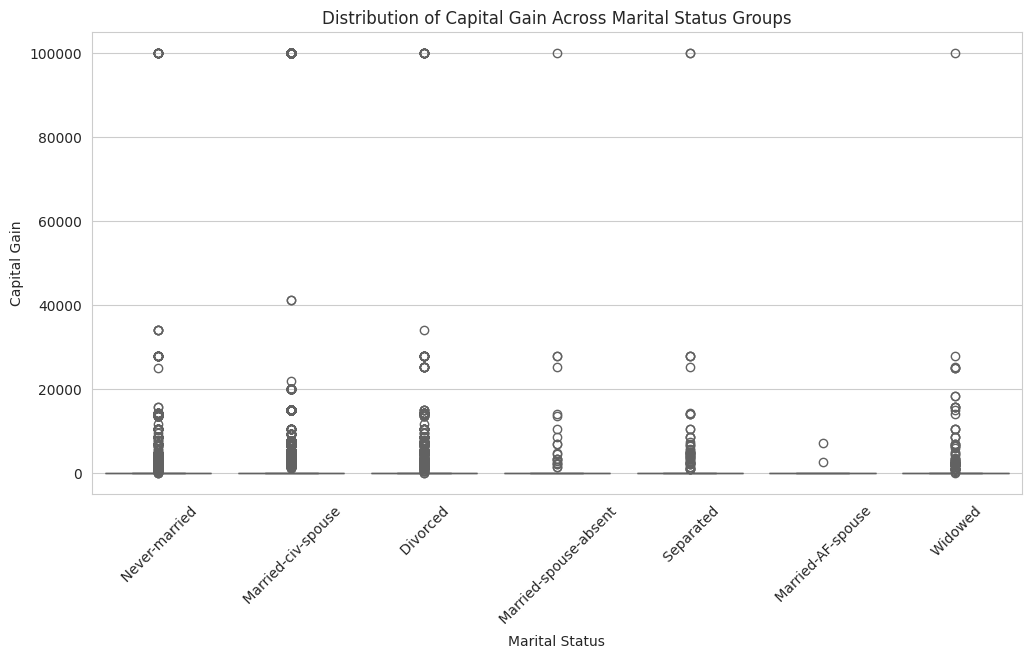

In [36]:
plt.figure(figsize=(12, 6))
sns.boxplot(
    x="marital-status", y="capital-gain", data=df, hue="marital-status", palette="Set3"
)
plt.title("Distribution of Capital Gain Across Marital Status Groups")
plt.xlabel("Marital Status")
plt.ylabel("Capital Gain")
plt.xticks(rotation=45)
plt.show()